In [1]:
import os,datetime,sys,fnmatch
from netCDF4 import Dataset
import numpy as np
from pyhdf.SD import SD, SDC

In [2]:
dataset = Dataset('MOD06_L2.A2000182.1620.006.2014294095015.hdf')
#print(dataset.variables.keys())
pix_lat = dataset.variables['Latitude'][:]
#print(pix_lat)
print(pix_lat.shape)
pix_lg = dataset.variables['Longitude'][:]
#print(pix_lg)
print(pix_lg.shape)
pix_cot= dataset.variables['Cloud_Optical_Thickness'][:]

print(pix_cot)
print(pix_cot.shape)

pixle_cm=dataset.variables['Cloud_Mask_1km'][:]

print(pixle_cm.shape)

MOD03_dataset = Dataset('MOD03.A2000182.1620.006.2012253190458.hdf')
pix_lat = MOD03_dataset.variables['Latitude'][:]
print("the lat shap is %d %d"%(pix_lat.shape[0], pix_lat.shape[1]))
np.savetxt('granule_lat.txt', pix_lat, delimiter=',')
pix_lg = MOD03_dataset.variables['Longitude'][:]
print("the lng shap is %d %d"%(pix_lg.shape[0], pix_lg.shape[1]))

#np.savetxt('granule_lng.txt', pix_lg, delimiter=',')

#np.savetxt('cot.txt', pix_cot[600:1000, 300:600], delimiter=',')


print(pix_cot)
print(pix_cot.shape)

(406, 270)
(406, 270)
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- 12.229999726638198 ... 4.779999893158674 -- --]
 [-- -- 12.11999972909689 ... 4.279999904334545 -- --]
 [-- -- 9.769999781623483 ... 6.139999862760305 -- --]]
(2030, 1354)
(2030, 1354, 2)
the lat shap is 2030 1354
the lng shap is 2030 1354
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- 12.229999726638198 ... 4.779999893158674 -- --]
 [-- -- 12.11999972909689 ... 4.279999904334545 -- --]
 [-- -- 9.769999781623483 ... 6.139999862760305 -- --]]
(2030, 1354)


-28.130272
-7.0925474
-100.74619
-74.55717
-17.61141014099121
-87.65167999267578
2748620
2748620
x limit is 2030
y limit is 1354
-7.0925474
-95.561005
-7.0925474
-95.561005
-24.734602
-100.74619
-28.130272
-77.36313
-28.130272
-77.36313


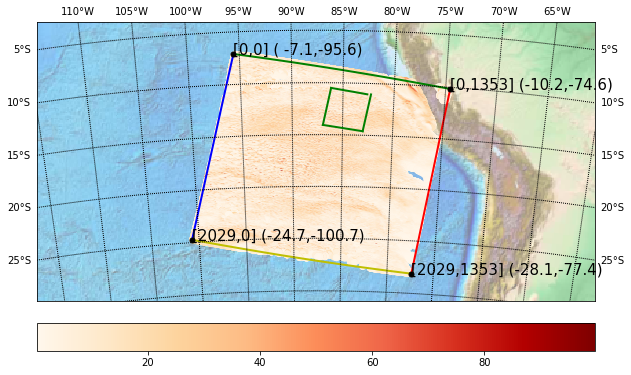

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

l_0=np.min(pix_lat.ravel())
l_x=np.max(pix_lat.ravel())

print(l_0)
print(l_x)


g_0=np.min(pix_lg.ravel())
g_x=np.max(pix_lg.ravel())

print(g_0)
print(g_x)

print((l_0+l_x)/2)
print((g_0+g_x)/2)

lat = pix_lat.ravel()
lon = pix_lg.ravel()

print(len(lat))
print(len(lon))
cot=pix_cot.ravel()


fig = plt.figure(figsize=(10, 8))
#m = Basemap(projection='lcc', resolution=None, width=6E6, height=4E6, 
#            lat_0= 15, lon_0= 170)

m = Basemap(projection='lcc', resolution=None, width=6E6, height=3E6, 
            lat_0= (l_0+l_x)/2, lon_0= (g_0+g_x)/2)


m.etopo(scale=0.5, alpha=0.5)


x_d=pix_lat.shape[0]
print('x limit is %d'%(x_d))

y_d=pix_lat.shape[1]
print('y limit is %d'%(y_d))


print(pix_lat[0,0])
print(pix_lg[0,0])



nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
print(nylat)
print(nylon)
# lonlat, lonlon are lat/lon of London.
lonlat = pix_lat[x_d-1,0]; lonlon=pix_lg[x_d-1,0]
print(lonlat)
print(lonlon)
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b') # blue is the first column


nylat = pix_lat[0,y_d-1]; nylon = pix_lg[0,y_d-1]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)

print(lonlon)
# draw great circle route between NY and London
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r') # red is the last column




nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
lonlat = pix_lat[0,y_d-1]; lonlon=pix_lg[0,y_d-1]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g') # green is the first row


nylat = pix_lat[x_d-1,0]; nylon = pix_lg[x_d-1,0]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)
print(lonlon)
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='y')# yellow is the last row






x=pix_lat[0,0]
y=pix_lg[0,0]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,0] (%5.1f,%3.1f)' % (x, y), fontsize=15)


x=pix_lat[0,y_d-1]
y=pix_lg[0,y_d-1]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,%d] (%5.1f,%3.1f)' % (y_d-1, x, y), fontsize=15)




x=pix_lat[x_d-1, y_d-1]
y=pix_lg[x_d-1, y_d-1]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,%d] (%5.1f,%3.1f)' % (x_d-1, y_d-1, x, y), fontsize=15)



x=pix_lat[x_d-1,0]
y=pix_lg[x_d-1,0]


lx, ly = m(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,0] (%5.1f,%3.1f)' % (x_d-1, x, y), fontsize=15)







m.drawparallels(np.arange(-90,90,5),labels=[1,1,0,0])

m.drawmeridians(np.arange(-180,180,5),labels=[0,0,1,0])



llat, llon=m(lon, lat)
cotaj=cot/np.max(cot)

sc=m.scatter(llat, llon, c=cot, cmap='OrRd')

cbar = plt.colorbar(orientation='horizontal', shrink=1, aspect=20, fraction=0.1,pad=0.05)




nylat = pix_lat[200,600]; nylon = pix_lg[200,600]
lonlat = pix_lat[600,600]; lonlon=pix_lg[600,600]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[200,600]; nylon = pix_lg[200,600]
lonlat = pix_lat[200,1000]; lonlon=pix_lg[400,1000]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600,600]; nylon = pix_lg[600,600]
lonlat = pix_lat[600,1000]; lonlon=pix_lg[600,1000]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[200,1000]; nylon = pix_lg[200,1000]
lonlat = pix_lat[600,1000]; lonlon=pix_lg[600,1000]
m.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')





plt.show()

-28.130272
-7.0925474
-100.74619
-74.55717
-17.61141014099121
-87.65167999267578
2748620
2748620
x limit is 2030
y limit is 1354
-7.0925474
-95.561005
-7.0925474
-95.561005
-24.734602
-100.74619
-28.130272
-77.36313
-28.130272
-77.36313


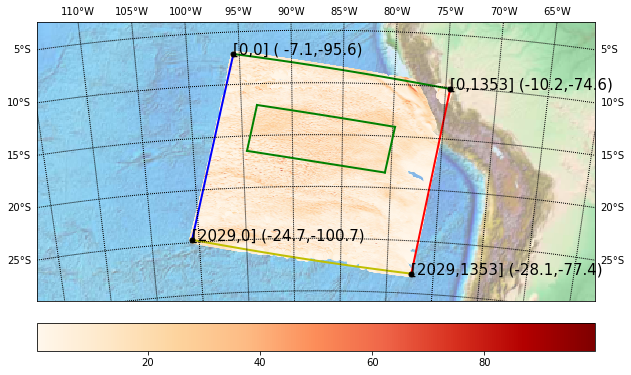

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

l_0=np.min(pix_lat.ravel())
l_x=np.max(pix_lat.ravel())

print(l_0)
print(l_x)


g_0=np.min(pix_lg.ravel())
g_x=np.max(pix_lg.ravel())

print(g_0)
print(g_x)

print((l_0+l_x)/2)
print((g_0+g_x)/2)

lat = pix_lat.ravel()
lon = pix_lg.ravel()

print(len(lat))
print(len(lon))
cot=pix_cot.ravel()


fig = plt.figure(figsize=(10, 8))
#m = Basemap(projection='lcc', resolution=None, width=6E6, height=4E6, 
#            lat_0= 15, lon_0= 170)

mm = Basemap(projection='lcc', resolution=None, width=6E6, height=3E6, 
            lat_0= (l_0+l_x)/2, lon_0= (g_0+g_x)/2)


mm.etopo(scale=0.5, alpha=0.5)


x_d=pix_lat.shape[0]
print('x limit is %d'%(x_d))

y_d=pix_lat.shape[1]
print('y limit is %d'%(y_d))


print(pix_lat[0,0])
print(pix_lg[0,0])



nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
print(nylat)
print(nylon)
# lonlat, lonlon are lat/lon of London.
lonlat = pix_lat[x_d-1,0]; lonlon=pix_lg[x_d-1,0]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b') # blue is the first column


nylat = pix_lat[0,y_d-1]; nylon = pix_lg[0,y_d-1]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)

print(lonlon)
# draw great circle route between NY and London
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r') # red is the last column




nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
lonlat = pix_lat[0,y_d-1]; lonlon=pix_lg[0,y_d-1]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g') # green is the first row


nylat = pix_lat[x_d-1,0]; nylon = pix_lg[x_d-1,0]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='y')# yellow is the last row






x=pix_lat[0,0]
y=pix_lg[0,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,0] (%5.1f,%3.1f)' % (x, y), fontsize=15)


x=pix_lat[0,y_d-1]
y=pix_lg[0,y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,%d] (%5.1f,%3.1f)' % (y_d-1, x, y), fontsize=15)




x=pix_lat[x_d-1, y_d-1]
y=pix_lg[x_d-1, y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,%d] (%5.1f,%3.1f)' % (x_d-1, y_d-1, x, y), fontsize=15)



x=pix_lat[x_d-1,0]
y=pix_lg[x_d-1,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,0] (%5.1f,%3.1f)' % (x_d-1, x, y), fontsize=15)







mm.drawparallels(np.arange(-90,90,5),labels=[1,1,0,0])

mm.drawmeridians(np.arange(-180,180,5),labels=[0,0,1,0])



llat, llon=mm(lon, lat)
cotaj=cot/np.max(cot)

sc=mm.scatter(llat, llon, c=cot, cmap='OrRd')

cbar = plt.colorbar(orientation='horizontal', shrink=1, aspect=20, fraction=0.1,pad=0.05)




nylat = pix_lat[500,100]; nylon = pix_lg[500,100]
lonlat = pix_lat[500,1200]; lonlon=pix_lg[500,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[500, 100]; nylon = pix_lg[500,100]
lonlat = pix_lat[1000,100]; lonlon=pix_lg[1000,100]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[500,1200]; nylon = pix_lg[500,1200]
lonlat = pix_lat[1000,1200]; lonlon=pix_lg[1000,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[1000,100]; nylon = pix_lg[1000,100]
lonlat = pix_lat[1000,1200]; lonlon=pix_lg[1000,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')





plt.show()

-49.855335
-28.392595
86.863235
119.89161
-39.123966217041016
103.37742614746094
2748620
2748620
x limit is 2030
y limit is 1354
-28.392595
95.64466
-28.392595
95.64466
-45.32218
86.863235
-49.855335
118.19102
-49.855335
118.19102


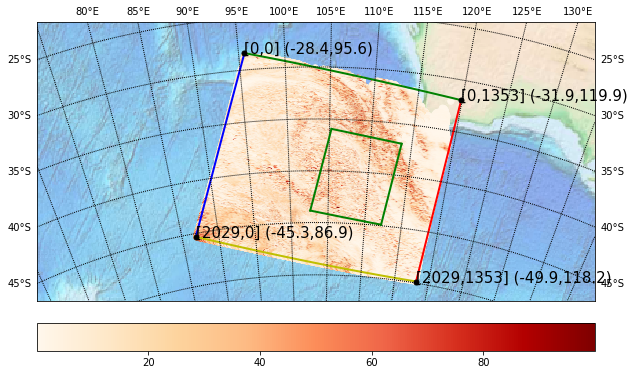

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

l_0=np.min(pix_lat.ravel())
l_x=np.max(pix_lat.ravel())

print(l_0)
print(l_x)


g_0=np.min(pix_lg.ravel())
g_x=np.max(pix_lg.ravel())

print(g_0)
print(g_x)

print((l_0+l_x)/2)
print((g_0+g_x)/2)

lat = pix_lat.ravel()
lon = pix_lg.ravel()

print(len(lat))
print(len(lon))
cot=pix_cot.ravel()


fig = plt.figure(figsize=(10, 8))
#m = Basemap(projection='lcc', resolution=None, width=6E6, height=4E6, 
#            lat_0= 15, lon_0= 170)

mm = Basemap(projection='lcc', resolution=None, width=6E6, height=3E6, 
            lat_0= (l_0+l_x)/2, lon_0= (g_0+g_x)/2)


mm.etopo(scale=0.5, alpha=0.5)


x_d=pix_lat.shape[0]
print('x limit is %d'%(x_d))

y_d=pix_lat.shape[1]
print('y limit is %d'%(y_d))


print(pix_lat[0,0])
print(pix_lg[0,0])



nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
print(nylat)
print(nylon)
# lonlat, lonlon are lat/lon of London.
lonlat = pix_lat[x_d-1,0]; lonlon=pix_lg[x_d-1,0]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='b') # blue is the first column


nylat = pix_lat[0,y_d-1]; nylon = pix_lg[0,y_d-1]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)

print(lonlon)
# draw great circle route between NY and London
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='r') # red is the last column




nylat = pix_lat[0,0]; nylon = pix_lg[0,0]
lonlat = pix_lat[0,y_d-1]; lonlon=pix_lg[0,y_d-1]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g') # green is the first row


nylat = pix_lat[x_d-1,0]; nylon = pix_lg[x_d-1,0]
lonlat = pix_lat[x_d-1,y_d-1]; lonlon=pix_lg[x_d-1,y_d-1]
print(lonlat)
print(lonlon)
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='y')# yellow is the last row






x=pix_lat[0,0]
y=pix_lg[0,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,0] (%5.1f,%3.1f)' % (x, y), fontsize=15)


x=pix_lat[0,y_d-1]
y=pix_lg[0,y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[0,%d] (%5.1f,%3.1f)' % (y_d-1, x, y), fontsize=15)




x=pix_lat[x_d-1, y_d-1]
y=pix_lg[x_d-1, y_d-1]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,%d] (%5.1f,%3.1f)' % (x_d-1, y_d-1, x, y), fontsize=15)



x=pix_lat[x_d-1,0]
y=pix_lg[x_d-1,0]


lx, ly = mm(y, x)
plt.plot(lx, ly, 'ok', markersize=5)
plt.text(lx, ly, '[%d,0] (%5.1f,%3.1f)' % (x_d-1, x, y), fontsize=15)







mm.drawparallels(np.arange(-90,90,5),labels=[1,1,0,0])

mm.drawmeridians(np.arange(-180,180,5),labels=[0,0,1,0])



llat, llon=mm(lon, lat)
cotaj=cot/np.max(cot)

sc=mm.scatter(llat, llon, c=cot, cmap='OrRd')

cbar = plt.colorbar(orientation='horizontal', shrink=1, aspect=20, fraction=0.1,pad=0.05)




nylat = pix_lat[600,600]; nylon = pix_lg[600,600]
lonlat = pix_lat[1500,600]; lonlon=pix_lg[1500,600]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600, 600]; nylon = pix_lg[600,600]
lonlat = pix_lat[600,1200]; lonlon=pix_lg[600,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[1500,600]; nylon = pix_lg[1500,600]
lonlat = pix_lat[1500,1200]; lonlon=pix_lg[1500,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')


nylat = pix_lat[600,1200]; nylon = pix_lg[600,1200]
lonlat = pix_lat[1500,1200]; lonlon=pix_lg[1500,1200]
mm.drawgreatcircle(nylon,nylat,lonlon,lonlat,linewidth=2,color='g')





plt.show()

In [9]:
file_ll = np.array([0, 0])

cot_files = np.array(["The file list of cot"]) #
cer_files = np.array(["The file list of cer"])

pix_cer= dataset.variables['Cloud_Effective_Radius'][:]

print(pix_cer.shape)

f_n='A2000182.1620.'






for i in range(0, 10):
    for j in range(0, 22):
        x= 500+i*50           #row number of the first element of the 50 by 50 area
        y= 100+j*50           #column
        new_ll  = np.array([x, y])
        file_ll = np.vstack((file_ll, new_ll))
        
        cot_px=pix_cot[x:(x+50) , y:(y+50)]
        output_fp = f_n+'_cot_{:04d}_{:04}.txt'.format(x, y)
        #cot_mt=pix_lat[x:(x+51), y:(y+51)]
        #print('x is %d '%(x))
        #print('x+50 is %d '%(x+50))
        #print(len(cot_px[1 ,: ]))
        #print(cot_px.shape)
        np.savetxt(output_fp, cot_px, delimiter=',')
        
        cot_file_name=np.array([output_fp])
        cot_files=np.vstack((cot_files, cot_file_name))
        
 
        
        cot_cer=pix_cer[x:(x+50) , y:(y+50)]
        output_cer_fp = f_n+'_cer_{:04d}_{:04}.txt'.format(x, y)
        np.savetxt(output_cer_fp,cot_cer, delimiter=',')
        
        cer_file_name=np.array([output_cer_fp])
        cer_files=np.vstack((cer_files, cer_file_name))        
        
        
        
file_ll  =np.delete(file_ll, (0), axis=0)     
print(file_ll)
np.savetxt(f_n+'file_row_col_list.txt', file_ll, delimiter=',')    

cot_files =np.delete(cot_files, (0), axis=0)     
print(cot_files)

np.savetxt(f_n+'file_cot_list.txt', cot_files, delimiter=", ", fmt="%s")


cer_files =np.delete(cer_files, (0), axis=0)     
print(cer_files)

np.savetxt(f_n+'file_cer_list.txt', cer_files, delimiter=", ", fmt="%s")

(2030, 1354)
[[ 500  100]
 [ 500  150]
 [ 500  200]
 [ 500  250]
 [ 500  300]
 [ 500  350]
 [ 500  400]
 [ 500  450]
 [ 500  500]
 [ 500  550]
 [ 500  600]
 [ 500  650]
 [ 500  700]
 [ 500  750]
 [ 500  800]
 [ 500  850]
 [ 500  900]
 [ 500  950]
 [ 500 1000]
 [ 500 1050]
 [ 500 1100]
 [ 500 1150]
 [ 550  100]
 [ 550  150]
 [ 550  200]
 [ 550  250]
 [ 550  300]
 [ 550  350]
 [ 550  400]
 [ 550  450]
 [ 550  500]
 [ 550  550]
 [ 550  600]
 [ 550  650]
 [ 550  700]
 [ 550  750]
 [ 550  800]
 [ 550  850]
 [ 550  900]
 [ 550  950]
 [ 550 1000]
 [ 550 1050]
 [ 550 1100]
 [ 550 1150]
 [ 600  100]
 [ 600  150]
 [ 600  200]
 [ 600  250]
 [ 600  300]
 [ 600  350]
 [ 600  400]
 [ 600  450]
 [ 600  500]
 [ 600  550]
 [ 600  600]
 [ 600  650]
 [ 600  700]
 [ 600  750]
 [ 600  800]
 [ 600  850]
 [ 600  900]
 [ 600  950]
 [ 600 1000]
 [ 600 1050]
 [ 600 1100]
 [ 600 1150]
 [ 650  100]
 [ 650  150]
 [ 650  200]
 [ 650  250]
 [ 650  300]
 [ 650  350]
 [ 650  400]
 [ 650  450]
 [ 650  500]
 [ 650  550]

In [10]:
cot_fn=np.genfromtxt(f_n+'file_cot_list.txt', dtype='str', delimiter='\n')
cer_fn=np.genfromtxt(f_n+'file_cer_list.txt', dtype='str', delimiter='\n')

flg=len(cot_fn)

final_file_cot_list=np.array(['The final cot file list'])
final_file_cer_list=np.array(['The final cer file list'])


for i in range(0,flg):
    cloud_cot=np.loadtxt(cot_fn[i], delimiter=',')
    sta_cot=cloud_cot.ravel()
    cloud_cer=np.loadtxt(cer_fn[i], delimiter=',')
    sta_cer=cloud_cot.ravel()
    
    if ( (not (np.sum(sta_cot==-9999)>1)) and (not (np.sum(sta_cer==-9999)>1)) ):
        print(i)
        print(cot_fn[i])
        print(cer_fn[i])
        final_file_cot_list = np.vstack((final_file_cot_list, cot_fn[i]))
        final_file_cer_list = np.vstack((final_file_cer_list, cer_fn[i]))
        
final_file_cot_list  =np.delete(final_file_cot_list, (0), axis=0)     
np.savetxt(f_n+'final_file_cot_list.txt', final_file_cot_list, delimiter=',', fmt="%s")

final_file_cer_list  =np.delete(final_file_cer_list, (0), axis=0)     
np.savetxt(f_n+'final_file_cer_list.txt', final_file_cer_list, delimiter=',', fmt="%s")
        
    
    
final_cot_fn=np.genfromtxt(f_n+'final_file_cot_list.txt', dtype='str', delimiter='\n') # read cot file name list 
final_cer_fn=np.genfromtxt(f_n+'final_file_cer_list.txt', dtype='str', delimiter='\n') # read corresponding ccer file name list

f_num=len(final_cot_fn)  # find the number of files in the list

for i in range(0, f_num):
    cloud_cot=np.loadtxt(final_cot_fn[i], delimiter=',')
    cloud_cer=np.loadtxt(final_cer_fn[i], delimiter=',')
    sta_cot=cloud_cot.ravel()
    sta_cer=cloud_cer.ravel()
    if ((not (np.sum(sta_cot==-9999)>1)) and (not (np.sum(sta_cer==-9999)>1))) :  # check if there is missing values
        print(i)             
        print(cloud_cot.shape)                                                    # check if it is 50 by 50  
        print(cloud_cer.shape)                                                    # check if it is 50 by 50 
        print(final_cot_fn[i])
        print(final_cer_fn[i])

4
A2000182.1620._cot_0500_0300.txt
A2000182.1620._cer_0500_0300.txt
5
A2000182.1620._cot_0500_0350.txt
A2000182.1620._cer_0500_0350.txt
16
A2000182.1620._cot_0500_0900.txt
A2000182.1620._cer_0500_0900.txt
17
A2000182.1620._cot_0500_0950.txt
A2000182.1620._cer_0500_0950.txt
18
A2000182.1620._cot_0500_1000.txt
A2000182.1620._cer_0500_1000.txt
19
A2000182.1620._cot_0500_1050.txt
A2000182.1620._cer_0500_1050.txt
20
A2000182.1620._cot_0500_1100.txt
A2000182.1620._cer_0500_1100.txt
21
A2000182.1620._cot_0500_1150.txt
A2000182.1620._cer_0500_1150.txt
25
A2000182.1620._cot_0550_0250.txt
A2000182.1620._cer_0550_0250.txt
26
A2000182.1620._cot_0550_0300.txt
A2000182.1620._cer_0550_0300.txt
36
A2000182.1620._cot_0550_0800.txt
A2000182.1620._cer_0550_0800.txt
37
A2000182.1620._cot_0550_0850.txt
A2000182.1620._cer_0550_0850.txt
38
A2000182.1620._cot_0550_0900.txt
A2000182.1620._cer_0550_0900.txt
39
A2000182.1620._cot_0550_0950.txt
A2000182.1620._cer_0550_0950.txt
40
A2000182.1620._cot_0550_1000.txt


44
(50, 50)
(50, 50)
A2000182.1620._cot_0750_0100.txt
A2000182.1620._cer_0750_0100.txt
45
(50, 50)
(50, 50)
A2000182.1620._cot_0750_0150.txt
A2000182.1620._cer_0750_0150.txt
46
(50, 50)
(50, 50)
A2000182.1620._cot_0750_0800.txt
A2000182.1620._cer_0750_0800.txt
47
(50, 50)
(50, 50)
A2000182.1620._cot_0750_0850.txt
A2000182.1620._cer_0750_0850.txt
48
(50, 50)
(50, 50)
A2000182.1620._cot_0750_0900.txt
A2000182.1620._cer_0750_0900.txt
49
(50, 50)
(50, 50)
A2000182.1620._cot_0750_0950.txt
A2000182.1620._cer_0750_0950.txt
50
(50, 50)
(50, 50)
A2000182.1620._cot_0750_1000.txt
A2000182.1620._cer_0750_1000.txt
51
(50, 50)
(50, 50)
A2000182.1620._cot_0750_1050.txt
A2000182.1620._cer_0750_1050.txt
52
(50, 50)
(50, 50)
A2000182.1620._cot_0750_1100.txt
A2000182.1620._cer_0750_1100.txt
53
(50, 50)
(50, 50)
A2000182.1620._cot_0800_0100.txt
A2000182.1620._cer_0800_0100.txt
54
(50, 50)
(50, 50)
A2000182.1620._cot_0800_0300.txt
A2000182.1620._cer_0800_0300.txt
55
(50, 50)
(50, 50)
A2000182.1620._cot_080

In [13]:
import numpy as np

final_cot_fn=np.genfromtxt('A2000182.1620.final_file_cot_list.txt', dtype='str', delimiter='\n') # read cot file name list 
final_cer_fn=np.genfromtxt('A2000182.1620.final_file_cer_list.txt', dtype='str', delimiter='\n') # read corresponding ccer file name list

f_num=len(final_cot_fn)  # find the number of files in the list

for i in range(0, f_num):
    cloud_cot=np.loadtxt(final_cot_fn[i], delimiter=',')
    cloud_cer=np.loadtxt(final_cer_fn[i], delimiter=',')
    sta_cot=cloud_cot.ravel()
    sta_cer=cloud_cer.ravel()
    if ((not (np.sum(sta_cot==-9999)>1)) and (not (np.sum(sta_cer==-9999)>1))) :  # check if there is missing values
        print(i)             
        print(cloud_cot.shape)                                                    # check if it is 50 by 50  
        print(cloud_cer.shape)

0
(50, 50)
(50, 50)
1
(50, 50)
(50, 50)
2
(50, 50)
(50, 50)
3
(50, 50)
(50, 50)
4
(50, 50)
(50, 50)
5
(50, 50)
(50, 50)
6
(50, 50)
(50, 50)
7
(50, 50)
(50, 50)
8
(50, 50)
(50, 50)
9
(50, 50)
(50, 50)
10
(50, 50)
(50, 50)
11
(50, 50)
(50, 50)
12
(50, 50)
(50, 50)
13
(50, 50)
(50, 50)
14
(50, 50)
(50, 50)
15
(50, 50)
(50, 50)
16
(50, 50)
(50, 50)
17
(50, 50)
(50, 50)
18
(50, 50)
(50, 50)
19
(50, 50)
(50, 50)
20
(50, 50)
(50, 50)
21
(50, 50)
(50, 50)
22
(50, 50)
(50, 50)
23
(50, 50)
(50, 50)
24
(50, 50)
(50, 50)
25
(50, 50)
(50, 50)
26
(50, 50)
(50, 50)
27
(50, 50)
(50, 50)
28
(50, 50)
(50, 50)
29
(50, 50)
(50, 50)
30
(50, 50)
(50, 50)
31
(50, 50)
(50, 50)
32
(50, 50)
(50, 50)
33
(50, 50)
(50, 50)
34
(50, 50)
(50, 50)
35
(50, 50)
(50, 50)
36
(50, 50)
(50, 50)
37
(50, 50)
(50, 50)
38
(50, 50)
(50, 50)
39
(50, 50)
(50, 50)
40
(50, 50)
(50, 50)
41
(50, 50)
(50, 50)
42
(50, 50)
(50, 50)
43
(50, 50)
(50, 50)
44
(50, 50)
(50, 50)
45
(50, 50)
(50, 50)
46
(50, 50)
(50, 50)
47
(50, 50)
(50, 50)
48